In [1]:
%matplotlib inline
import networkx as nx
from networkx.generators.atlas import graph_atlas_g
from networkx.algorithms.isomorphism.isomorph import graph_could_be_isomorphic as isomorphic
import matplotlib.pyplot as plt
import random
try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either PyGraphviz or pydot")

In [53]:
#def atlas6():
    """ Return the atlas of all connected graphs of 6 nodes or less.
        Attempt to check for isomorphisms and remove.
    """

    #Atlas = graph_atlas_g()[0:500]
    #Atlas = graph_atlas_g()[0:] # 208
    # remove isolated nodes, only connected graphs are left
    #U = nx.Graph() # graph for union of all graphs in atlas
    #for G in Atlas:
        #zerodegree = [n for n in G if G.degree(n) < 2]
        #for n in zerodegree:
            #G.remove_node(n)
        #U = nx.disjoint_union(U, G)

    # list of graphs of all connected components
    #C = [U.subgraph(c) for c in nx.connected_components(U)]

    #UU = nx.Graph()
    # do quick isomorphic-like check, not a true isomorphism checker
    #nlist = [] # list of nonisomorphic graphs
    #for G in C:
        # check against all nonisomorphic graphs so far
        #if not any(isomorphic(G, H) for H in nlist):
            #nlist.append(G)
            #UU = nx.disjoint_union(UU, G) # union the nonisomorphic graphs
    #return UU

In [109]:
#with open('Combined_WATER_TRIBP4HBonding%s.input.wat%s.xyz.O_TBP%s.xyz.GraphGeod' % ( str(t),str(t), str(t))) as init_graph_file:
import numpy as np
num_mol_1 = 216
num_mol_2 = 0
init_AM = np.zeros((num_mol_1 + num_mol_2,num_mol_1 + num_mol_2))
with open('Input-test1.water1.xyz.water1.xyz.GraphGeod') as init_graph_file:
# loop through CN output file and find edges, put into AM
    for line in init_graph_file:
        mol_1 = int(line.split()[0])
        mol_2 = int(line.split()[1])
        if mol_1 >= num_mol_1 and mol_2 >= num_mol_1:
            pass
        else:
            init_AM[mol_1 - 1][mol_2 - 1] = 1
            init_AM[mol_2 - 1][mol_1 - 1] = 1
# convert adjacency matrix to networkx formation
init_NX_AM = nx.from_numpy_matrix(init_AM)
G = init_NX_AM
#G = nx.number_connected_components(G)
#G = nx.from_numpy_matrix(init_NX_AM)#, create_using=nx.MultiGraph)
init_AM[1][25]


0.0

In [110]:
print(init_AM)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [112]:
np.savetxt('test_AM.csv',init_AM)

In [113]:
#G = init_NX_AM #atlas6() #init_NX_AM

print("graph has %d nodes with %d edges" % (nx.number_of_nodes(G), nx.number_of_edges(G)))
print(nx.number_connected_components(G), "connected components")
#remove = [node for node,degree in dict(G.degree()).items() if degree < 5]
#G.remove_nodes_from(remove)

graph has 216 nodes with 356 edges
1 connected components


In [7]:
#plt.figure(1, figsize=(8, 8))
# layout graphs with positions using graphviz neato
#pos = graphviz_layout(G , prog="neato")
# color nodes the same in each connected subgraph
#C = [G.subgraph(c) for c in nx.connected_components(G)]
#for g in C:
    #c = [random.random()] * nx.number_of_nodes(g) # random color...
    #nx.draw(g,
            #pos,
            #node_size=40,
            #node_color=c,
            #vmin=0.0,
            #vmax=1.0,
            #with_labels=False
            #)
#plt.savefig('crown_100_pic.pdf', bbox_inches='tight', ppi=1200)
#plt.show()

In [114]:
print(init_AM)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [115]:
cc= nx.connected_components(G)
print (type(cc))
print ([len(s) for s in cc])

<class 'generator'>
[216]


In [116]:
ccall = nx.clustering(G)
clustering_coefficient = nx.average_clustering(G)

print (clustering_coefficient)

0.0


Text(0.5, 1.0, 'clustering coefficients')

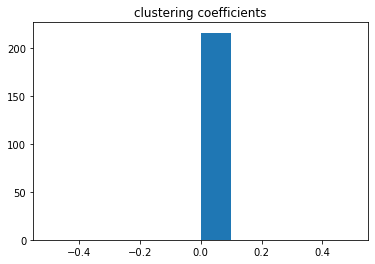

In [117]:
h,bins,patches = plt.hist(list(nx.clustering(G).values()))
plt.title('clustering coefficients')

0


Text(0.5, 1.0, 'Triangles')

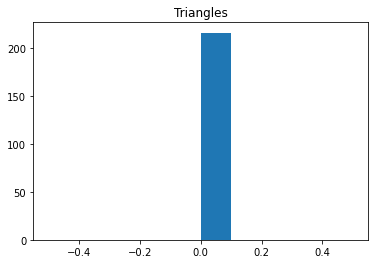

In [118]:
print(nx.triangles(G,0))
#print(nx.triangles(er))
h,bins, patches = plt.hist(list(nx.triangles(G).values()))
plt.title('Triangles')

In [119]:

nx.pagerank(G)

{0: 0.004167538978141227,
 1: 0.00520244499198776,
 2: 0.005839351520257999,
 3: 0.004555754055783559,
 4: 0.003117239215232519,
 5: 0.005654511241800568,
 6: 0.004222870040647041,
 7: 0.004201906499338688,
 8: 0.003187526278169101,
 9: 0.004398704119238883,
 10: 0.0051878277031493876,
 11: 0.0044309028134298,
 12: 0.005229221681645131,
 13: 0.005633178473512647,
 14: 0.005624934146494499,
 15: 0.005366112757859458,
 16: 0.005445513821569978,
 17: 0.00405435042451379,
 18: 0.004251623318077924,
 19: 0.005258920487495153,
 20: 0.0054342489711941815,
 21: 0.0030211347376693223,
 22: 0.004201684097659305,
 23: 0.0030385799306291606,
 24: 0.003145968026949358,
 25: 0.00430939640392441,
 26: 0.003175756504699466,
 27: 0.00302496224811451,
 28: 0.005209555616401521,
 29: 0.0024748073191528976,
 30: 0.005155014961258055,
 31: 0.0065186372079823265,
 32: 0.005798426102941557,
 33: 0.00568682499881967,
 34: 0.0055183122697254,
 35: 0.005386178014342333,
 36: 0.005199985945256261,
 37: 0.0046489

In [58]:
cc=nx.average_clustering(G) 
cc

0.0

In [59]:
c=nx.clustering(G)
c

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

In [120]:
pos = nx.spring_layout(G, iterations=100)

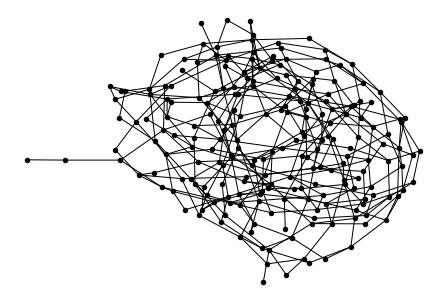

In [121]:
nx.draw(G, pos, node_color='k', node_size=20, with_labels=False)

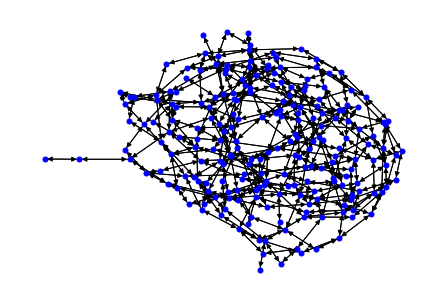

In [122]:
H = G.to_directed()
nx.draw(H, pos, node_color='b', node_size=25, with_labels=False)

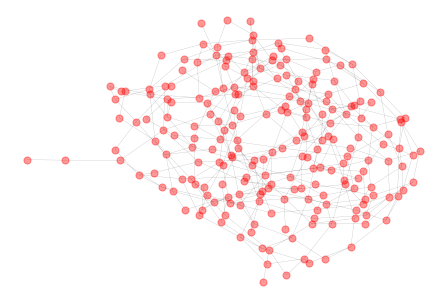

In [123]:
nx.draw(G, pos=pos, alpha=0.4, node_size=50, node_color='r', width=0.2)

In [124]:
pathlengths = []
# This prints the source node and the dictionary of shortest lengths to various nodes
for v in G.nodes():
    spl = nx.single_source_shortest_path_length(G, v)
    print('%s %s' % (v, spl))
    for p in spl.values():
        pathlengths.append(p)

0 {0: 0, 52: 1, 102: 1, 173: 1, 86: 2, 194: 2, 199: 2, 27: 2, 53: 2, 113: 2, 45: 2, 78: 2, 188: 2, 215: 2, 76: 3, 196: 3, 33: 3, 62: 3, 105: 3, 61: 3, 211: 3, 41: 3, 125: 3, 214: 3, 60: 3, 43: 3, 108: 3, 50: 3, 1: 3, 161: 3, 186: 3, 121: 4, 150: 4, 208: 4, 148: 4, 180: 4, 56: 4, 143: 4, 59: 4, 142: 4, 175: 4, 181: 4, 164: 4, 182: 4, 24: 4, 110: 4, 82: 4, 98: 4, 203: 4, 68: 4, 120: 4, 168: 4, 28: 4, 157: 4, 12: 4, 83: 4, 19: 4, 39: 4, 97: 4, 195: 4, 90: 4, 162: 4, 174: 4, 87: 5, 132: 5, 18: 5, 119: 5, 152: 5, 32: 5, 123: 5, 141: 5, 34: 5, 133: 5, 165: 5, 205: 5, 40: 5, 137: 5, 149: 5, 22: 5, 94: 5, 207: 5, 91: 5, 167: 5, 163: 5, 111: 5, 14: 5, 131: 5, 79: 5, 191: 5, 202: 5, 144: 5, 187: 5, 184: 5, 128: 5, 147: 5, 49: 5, 200: 5, 89: 5, 210: 5, 101: 5, 124: 5, 146: 5, 36: 5, 151: 5, 69: 5, 192: 5, 170: 5, 179: 5, 95: 5, 138: 5, 197: 5, 70: 5, 37: 6, 11: 6, 190: 6, 6: 6, 96: 6, 21: 6, 44: 6, 154: 6, 112: 6, 158: 6, 7: 6, 176: 6, 46: 6, 127: 6, 3: 6, 67: 6, 129: 6, 13: 6, 16: 6, 9: 6, 80: 6

In [125]:
print("average shortest path length %s" % (sum(pathlengths)/len(pathlengths)))

average shortest path length 5.274477023319616


In [126]:
# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p]+=1
    else:
        dist[p]=1
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print('%s %d' % (d,dist[d]))

length #paths
0 216
1 712
2 1772
3 3722
4 6946
5 10728
6 11870
7 7878
8 2464
9 318
10 30


In [127]:
import community

In [128]:
partition = community.best_partition(G)

In [129]:
list_of_communities=[]
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    list_of_communities.append(list_nodes)

In [130]:
count

10.0

In [131]:

sample_array = np.array(init_NX_AM)

In [132]:
k = 7

In [133]:
len(list_of_communities[k])

19

In [134]:
list_eges_community_k = []
for i in range(sample_array.shape[0]): 
    if sample_array[i][0] in list_of_communities[k] : 
        if sample_array[i][1] in list_of_communities[k] : 
            list_eges_community_k.append([sample_array[i][0],sample_array[i][1]])

IndexError: invalid index to scalar variable.

In [135]:
G_sample = G 
degree_centrality = nx.degree_centrality(G_sample)
closeness_centralirty = nx.closeness_centrality(G_sample)
betweenness_centrality = nx.betweenness_centrality(G_sample)

In [136]:
degree_centrality

{0: 0.013953488372093023,
 1: 0.018604651162790697,
 2: 0.018604651162790697,
 3: 0.013953488372093023,
 4: 0.009302325581395349,
 5: 0.018604651162790697,
 6: 0.013953488372093023,
 7: 0.013953488372093023,
 8: 0.009302325581395349,
 9: 0.013953488372093023,
 10: 0.018604651162790697,
 11: 0.013953488372093023,
 12: 0.018604651162790697,
 13: 0.018604651162790697,
 14: 0.018604651162790697,
 15: 0.018604651162790697,
 16: 0.018604651162790697,
 17: 0.013953488372093023,
 18: 0.013953488372093023,
 19: 0.018604651162790697,
 20: 0.018604651162790697,
 21: 0.009302325581395349,
 22: 0.013953488372093023,
 23: 0.009302325581395349,
 24: 0.009302325581395349,
 25: 0.013953488372093023,
 26: 0.009302325581395349,
 27: 0.009302325581395349,
 28: 0.018604651162790697,
 29: 0.004651162790697674,
 30: 0.018604651162790697,
 31: 0.023255813953488372,
 32: 0.018604651162790697,
 33: 0.018604651162790697,
 34: 0.018604651162790697,
 35: 0.018604651162790697,
 36: 0.018604651162790697,
 37: 0.0139

In [120]:
betweenness_centrality

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 1.582779360557138e-05,
 31: 0.0,
 32: 0.0,
 33: 1.582779360557138e-05,
 34: 1.582779360557138e-05,
 35: 1.582779360557138e-05,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 72: 0.0,
 73: 0.0,
 74: 0.0,
 75: 0.0,
 76: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.0,
 81: 0.0,
 82: 0.0,
 83: 0.0,
 84: 0.0,
 85: 0.0,
 86: 0.0,
 87: 0.0,
 88: 0.0,
 89: 0.0,
 90: 0.0,
 91: 0.0,
 92: 0.0,
 93: 0.0

In [121]:
centrality = {}
for key in degree_centrality.keys() : 
    centrality[key]= 1/2*degree_centrality[key] + 1/4*closeness_centralirty[key] + 1/4*betweenness_centrality[key]

In [127]:
centrality.values()

dict_values([0.0018082055119092158, 0.0018082055119092158, 0.0018082055119092158, 0.0018082055119092158, 0.0018082055119092158, 0.0018082055119092158, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0021490626428898032, 0.0021490626428898032, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0032961380183602405, 0.00205761316872428, 0.00205761316872428, 0.0032961380183602405, 0.0032961380183602405, 0.0032961380183602405, 0.001469723691945914, 0.001469723691945914, 0.0, 0.0, 0.001469723691945914, 0.001469723691945914, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0021490626428898032, 0.0021490626428898032, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018082055119092158, 0.0018082055119092158, 0.0018082055119092158, 0.0018082055119092158, 0.0018082055119092158, 0.0018082055119092158, 0.0, 0.0013031550068587105, 0.0013031550068587105, 0.0013031550068587105, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018082055119092158, 

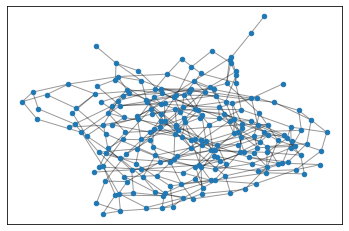

In [137]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
Gcc = sorted((G.subgraph(c) for c in nx.connected_components(G)), key = len, reverse=True)[0]
pos = nx.spring_layout(Gcc)
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()


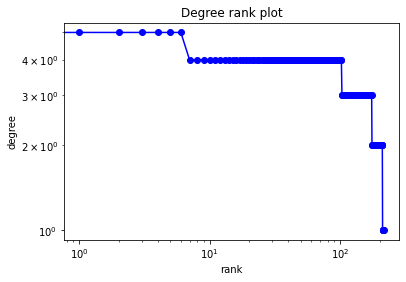

In [138]:
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.axes([0.45,0.45,0.45,0.45])
plt.axis('off')
plt.show()

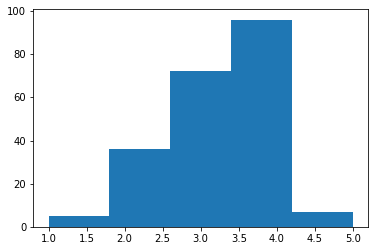

In [139]:
h,bins,patches = plt.hist(degree_sequence,bins=dmax)

In [140]:
print(h)

[ 5. 36. 72. 96.  7.]


In [141]:
print(bins)

[1.  1.8 2.6 3.4 4.2 5. ]


Text(0, 0.5, 'number of nodes')

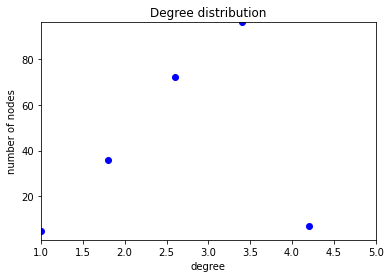

In [142]:
hmax=max(h)
plt.axis([1,dmax,1,hmax]) # set ranges
x=bins.compress(h)
y=h.compress(h)
plt.plot(x,y,'bo')
plt.title("Degree distribution")
plt.xlabel("degree")
plt.ylabel("number of nodes")

Text(0.5, 1.0, 'clustering coefficients')

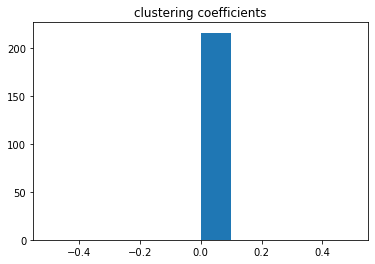

In [143]:
h,bins,patches = plt.hist(list(nx.clustering(G).values()))
plt.title('clustering coefficients')

In [144]:
init_clusters = []
init_clusters_gen = nx.connected_components(init_NX_AM)
for element in init_clusters_gen:
    init_clusters = init_clusters + [list(element)]
print (len(init_clusters))    

1


In [145]:
for i in init_clusters:
    print(len(i))

216


In [146]:
for i in range(len(init_AM)) : 
    print((init_AM[1][i]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0


In [149]:
centrality = nx.eigenvector_centrality(G)

In [150]:
print(['%s %0.2f'%(node,centrality[node]) for node in centrality])

['0 0.06', '1 0.13', '2 0.03', '3 0.03', '4 0.03', '5 0.06', '6 0.05', '7 0.06', '8 0.02', '9 0.04', '10 0.11', '11 0.03', '12 0.11', '13 0.04', '14 0.06', '15 0.08', '16 0.06', '17 0.08', '18 0.04', '19 0.11', '20 0.08', '21 0.03', '22 0.06', '23 0.05', '24 0.02', '25 0.05', '26 0.03', '27 0.04', '28 0.10', '29 0.00', '30 0.11', '31 0.11', '32 0.05', '33 0.06', '34 0.10', '35 0.08', '36 0.10', '37 0.02', '38 0.06', '39 0.10', '40 0.05', '41 0.02', '42 0.03', '43 0.09', '44 0.03', '45 0.07', '46 0.04', '47 0.04', '48 0.03', '49 0.04', '50 0.09', '51 0.04', '52 0.06', '53 0.04', '54 0.04', '55 0.02', '56 0.04', '57 0.03', '58 0.08', '59 0.06', '60 0.08', '61 0.05', '62 0.11', '63 0.09', '64 0.06', '65 0.01', '66 0.04', '67 0.02', '68 0.05', '69 0.16', '70 0.09', '71 0.06', '72 0.06', '73 0.03', '74 0.03', '75 0.10', '76 0.04', '77 0.03', '78 0.09', '79 0.05', '80 0.03', '81 0.08', '82 0.02', '83 0.04', '84 0.04', '85 0.07', '86 0.04', '87 0.01', '88 0.05', '89 0.13', '90 0.10', '91 0.05

Largest eigenvalue: 1.914778160502754
Smallest eigenvalue: 2.7478019859472624e-15


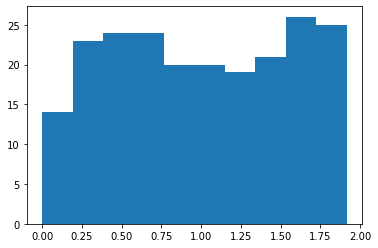

In [154]:
L = nx.normalized_laplacian_matrix(G)
e = np.linalg.eigvals(L.A)
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e, bins=10)  # histogram with 100 bins
#plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.show()